<a href="https://colab.research.google.com/github/renenxie/Github-Colab/blob/main/classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd ##修改

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv"
data = pd.read_csv(url)
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [ ]:
data["Gender"] = data["Gender"].map({"男生": 1, "女生": 0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x = data[["Age", "Weight", "BloodSugar", "Gender"]]
y = data["Diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[ 1.4964114 ,  0.95077942,  1.01425033, -1.06458129],
       [ 1.43615575, -0.2915795 ,  0.06547324, -1.06458129],
       [ 1.67717835, -0.67713916, -2.28906075,  0.93933644],
       [-1.63688239,  1.12213927,  0.23520859,  0.93933644],
       [-1.09458154,  0.99361938, -0.27834966,  0.93933644],
       [ 1.67717835, -1.44825849, -0.86589511,  0.93933644],
       [ 0.05027581, -1.40541853, -0.0346271 , -1.06458129],
       [ 1.79768965,  0.26534002,  1.90644898, -1.06458129],
       [-1.21509284,  1.07929931, -0.07814898,  0.93933644],
       [ 0.89385491,  0.73657961,  1.27973383,  0.93933644],
       [-1.33560414, -0.2915795 ,  0.45281801,  0.93933644],
       [-1.21509284,  0.00830024, -0.7179207 , -1.06458129],
       [-0.25100244, -0.07737968, -2.03663381,  0.93933644],
       [-0.13049114,  1.07929931, -0.49160689, -1.06458129],
       [ 0.65283231,  1.50769894,  0.38753519,  0.93933644],
       [ 0.83359926, -0.2915795 , -0.09990993, -1.06458129],
       [ 0.59257666, -0.

In [ ]:
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
w = np.array([1, 2, 3, 4])
b = 1
z = (w*x_train).sum(axis=1) + b
y_pred = sigmoid(z)
# -y*log(y_pred) - (1-y)*log(1-y_pred)
cost = -y_train*np.log(y_pred) - (1-y_train)*np.log(1-y_pred)
cost.mean()

1.3959515636868534

In [ ]:
def compute_cost(x, y, w, b):
  z = (w*x).sum(axis=1) + b
  y_pred = sigmoid(z)
  cost = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
  cost = cost.mean()
  return cost

In [ ]:
w = np.array([1, 4, 2, 4])
b = 2
compute_cost(x_train, y_train, w, b)

1.9542777292019753

In [ ]:
z = (w*x_train).sum(axis=1) + b
y_pred = sigmoid(z)
b_gradient = (y_pred - y_train).mean()
w_gradient = np.zeros(x_train.shape[1])

for i in range(x_train.shape[1]):
  w_gradient[i] = (x_train[:, i]*(y_pred - y_train)).mean()

w_gradient, b_gradient

(array([ 0.04176112,  0.13246515, -0.12945482,  0.21952511]),
 0.29409673395976715)

In [ ]:
def compute_gradient(x, y, w, b):
  z = (w*x).sum(axis=1) + b
  y_pred = sigmoid(z)
  w_gradient = np.zeros(x.shape[1])
  b_gradient = (y_pred - y).mean()
  for i in range(x.shape[1]):
    w_gradient[i] = (x[:, i]*(y_pred - y)).mean()

  return w_gradient, b_gradient

In [ ]:
w = np.array([1, 2, 2, 3])
b = 5
compute_gradient(x_train, y_train, w, b)

(array([ 0.02951124, -0.00123345, -0.20911372,  0.15024735]),
 0.518806798216479)

In [ ]:
w = np.array([1, 2, 2, 3])
b = 5
learning_rate = 1
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
print(compute_cost(x_train, y_train, w, b))
w = w - w_gradient*learning_rate
b = b - b_gradient*learning_rate
w, b
print(compute_cost(x_train, y_train, w, b))

2.8154062345431683
2.487342502355539


In [ ]:
np.set_printoptions(formatter={'float': '{: .2e}'.format})
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [ ]:
w_init = np.array([1, 2, 2, 3])
b_init = 5
learning_rate = 1
run_iter = 10000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  2.4873e+00, w: [ 9.70e-01  2.00e+00  2.21e+00  2.85e+00], b:  4.48e+00, w_gradient: [ 2.95e-02 -1.23e-03 -2.09e-01  1.50e-01], b_gradient:  5.19e-01
Iteration  1000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 5.36e-07  1.44e-06 -7.74e-06  4.51e-07], b_gradient:  3.32e-06
Iteration  2000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 4.40e-10  1.18e-09 -6.36e-09  3.70e-10], b_gradient:  2.73e-09
Iteration  3000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 3.61e-13  9.73e-13 -5.22e-12  3.04e-13], b_gradient:  2.24e-12
Iteration  4000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 2.98e-16  8.01e-16 -4.30e-15  2.44e-16], b_gradient:  1.92e-15
Iteration  5000 : Cost  2.3005e-01, w: [-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b: -2.24e+00, w_gradient: [ 1.94e-17  2.36e-17 -4.33e

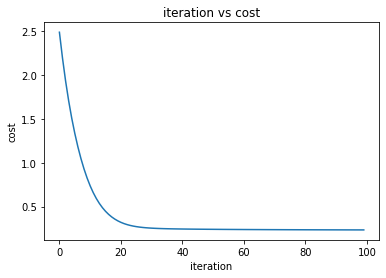

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

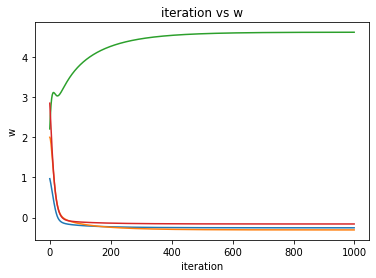

In [ ]:
plt.plot(np.arange(0, 1000), w_hist[:1000])
plt.title("iteration vs w")
plt.xlabel("iteration")
plt.ylabel("w")
plt.show()

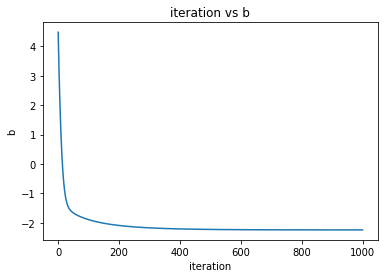

In [ ]:
plt.plot(np.arange(0, 1000), b_hist[:1000])
plt.title("iteration vs b")
plt.xlabel("iteration")
plt.ylabel("b")
plt.show()

In [ ]:
w_final, b_final

(array([-2.53e-01, -3.06e-01,  4.62e+00, -1.58e-01]), -2.2423167596289706)

In [ ]:
z = (w_final*x_test).sum(axis=1) + b_final
y_pred = sigmoid(z)
y_pred = np.where(y_pred>0.5, 1, 0)
acc = (y_pred==y_test).sum() / len(y_test) * 100
print(f"正確率 {acc}%")

正確率 90.0%


In [ ]:
# 72 92 102 女生
# 62 52 120 男生
x_real = np.array([[72, 92, 102, 0], [62, 52, 120, 1]])
x_real = scaler.transform(x_real)
z = (w_final*x_real).sum(axis=1) + b_final
y_real = sigmoid(z)
y_real

array([ 4.35e-02,  7.08e-01])